<a href="https://colab.research.google.com/github/kabta/tweepyproject_twitterscraping/blob/main/tweepy_twitterscraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries

In [ ]:
import os
import tweepy as tw
from tweepy import OAuthHandler
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
%matplotlib inline 

nltk.download('vader_lexicon')
#importing sentimentintensityanaylzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import wordcloud

import csv
import time
import sys


import networkx as nx
import pandas as pd

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Access details from twitter developer account

In [ ]:
accesstoken = '1582767394740633601-c4rI6QFraHCgq7UHPhC7C9O60kSVv4'
accesstokensecret = 'mMW1jneGYWxyaqSM996vvPK4Kpi6dCIlQm30umK8B80Qs'
apikey = 'PsIxpuQ5m5kWzwkB9y4eQ5xdN'
apisecretkey= 'Odn8W3WUmuEHFNaSHQqB2VlzkHnI2KIlxg4Hdl4piNMik2H0fP'


In [ ]:
authhandler = tw.OAuthHandler(apikey, apisecretkey)
authhandler.set_access_token(accesstoken, accesstokensecret)
api = tw.API(authhandler, wait_on_rate_limit=True)

In [ ]:
search_words = "coronavirus OR covid19 OR covid-19 OR covid OR covid-vaccine OR covidisnotover"
date_since = "2022-11-01"

In [ ]:
tweetstwitter=[]
tweetstwitter = tw.Cursor(api.search, 
               q=search_words, 
               lang ="en", 
               since = date_since,
               count=100).items(1000)

In [ ]:
tweetstwitter

In [ ]:
# Create lists for each field desired from the tweets.
location_details= []
uscreen_name = []
tweets_details = []
time_createdate = []
for tweets_twitter in tweetstwitter:
 # get tweets_twitter.user.screen_name, tweets_twitter.created_at, tweets_twitter.text
  time_createdate.append(tweets_twitter.created_at)
  tweets_details.append(tweets_twitter.text)
  location_details.append(tweets_twitter.user.location)
  uscreen_name.append(tweets_twitter.user.screen_name)


In [ ]:
df_tweets = pd.DataFrame()
df_tweets['time_createdate'] = time_createdate
df_tweets['u_screen_name'] = uscreen_name
df_tweets['Tweets'] = tweets_details
df_tweets['location'] =location_details


Details of tweets without cleaning tweets

In [ ]:
df_tweets 


,time_createdate,u_screen_name,Tweets,location
0,2022-11-05 20:35:22,CarolPe64837759,RT @CaliforniaCodes: @WendyHassonMD Interestin...,Canada
1,2022-11-05 20:35:21,amakabot,People are blaming crime and covid restriction...,
2,2022-11-05 20:35:21,AbutiLawrence,RT @mfanafuthishaba: @ONTLAMI_WALENG @Olona151...,"Johannesburg, South Africa"
3,2022-11-05 20:35:20,thedotconnectr,"RT @davidzweig: New study, NEJM\n\n5-11 year o...",Planet Earth
4,2022-11-05 20:35:20,RUB1G,"@financialjuice Little understand, the China r...",
...,...,...,...,...
995,2022-11-05 20:30:34,docfreeride,RT @MLS_Dave: Strange that many of my coworker...,San Francisco Bay Area
996,2022-11-05 20:30:33,r1r_zilla_r1r,RT @SteveInmanUIC: Lots of people lose jobs. M...,
997,2022-11-05 20:30:33,Kathryn44556040,@nzherald So why wasn’t this done with the Cov...,"Christchurch City, New Zealand"
998,2022-11-05 20:30:33,NoHyperboleD,RT @PaulMoreschi1: @JonathanTurley Where were ...,


Tweets Column

In [ ]:
df_text = df_tweets.filter(['Tweets'])
df_text

,Tweets
0,RT @CaliforniaCodes: @WendyHassonMD Interestin...
1,People are blaming crime and covid restriction...
2,RT @mfanafuthishaba: @ONTLAMI_WALENG @Olona151...
3,"RT @davidzweig: New study, NEJM\n\n5-11 year o..."
4,"@financialjuice Little understand, the China r..."
...,...
995,RT @MLS_Dave: Strange that many of my coworker...
996,RT @SteveInmanUIC: Lots of people lose jobs. M...
997,@nzherald So why wasn’t this done with the Cov...
998,RT @PaulMoreschi1: @JonathanTurley Where were ...


In [ ]:
df_text.to_csv('tweets.csv', encoding='utf-8', index=False)

In [ ]:
cleaning tweets

In [ ]:
# function for twitter text cleaning
def tweets_clean(Tweets):
    #removing RT @
    Tweets = re.sub("RT @[\w]*:","",Tweets)
    #removing twitter handles (@user)
    Tweets = re.sub("(@[A-Za-z0-9_]+)","", Tweets)
    #removing url links
    Tweets = re.sub("https?://[A-Za-z0-9./]*","",Tweets)
    # remove whitespaces
    Tweets = ' '.join(Tweets.split())
    return Tweets
#Apply text cleaning function to text column in df_tweets dataframe
df_text['Tweets'] = df_text['Tweets'].apply(lambda x:tweets_clean(x))


In [ ]:
df_text

,Tweets
0,Interesting that COVID causes lung damage in c...
1,People are blaming crime and covid restriction...
2,"Covid-19 did not kill all Detectives, I surviv..."
3,"New study, NEJM 5-11 year olds: Vaccine Effect..."
4,"Little understand, the China rally isn't about..."
...,...
995,Strange that many of my coworkers/trainees in ...
996,Lots of people lose jobs. More people lost job...
997,So why wasn’t this done with the Covid funds t...
998,"Where were the defenders of liberty, those wit..."


Sentiment analysis on tweets

In [ ]:
sentimentAnalyzer = SentimentIntensityAnalyzer()
df_text["Positive"] = [sentimentAnalyzer.polarity_scores(i)["pos"] for i in df_text["Tweets"]]
df_text["Negative"] = [sentimentAnalyzer.polarity_scores(i)["neg"] for i in df_text["Tweets"]]
df_text["Neutral"] = [sentimentAnalyzer.polarity_scores(i)["neu"] for i in df_text["Tweets"]]
df_text['Compound'] = [sentimentAnalyzer.polarity_scores(i)["compound"] for i in df_text["Tweets"]]
df_text

,Tweets,Positive,Negative,Neutral,Compound
0,Interesting that COVID causes lung damage in c...,0.218,0.145,0.636,0.1531
1,People are blaming crime and covid restriction...,0.000,0.186,0.814,-0.5187
2,"Covid-19 did not kill all Detectives, I surviv...",0.540,0.000,0.460,0.7928
3,"New study, NEJM 5-11 year olds: Vaccine Effect...",0.108,0.000,0.892,0.3182
4,"Little understand, the China rally isn't about...",0.000,0.000,1.000,0.0000
...,...,...,...,...,...
995,Strange that many of my coworkers/trainees in ...,0.000,0.065,0.935,-0.1027
996,Lots of people lose jobs. More people lost job...,0.087,0.183,0.730,-0.4173
997,So why wasn’t this done with the Covid funds t...,0.000,0.186,0.814,-0.4939
998,"Where were the defenders of liberty, those wit...",0.284,0.127,0.588,0.2960


Final sentiment score

In [ ]:
score_sentiment = df_text["Compound"].values
sentiment = []
for i in score_sentiment:
    if i >= 0.05 :
        sentiment.append('Positive')
    elif i <= -0.05 :
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
      
df_text["Sentiment_score"] = sentiment

df_text

,Tweets,Positive,Negative,Neutral,Compound,Sentiment_score
0,Interesting that COVID causes lung damage in c...,0.218,0.145,0.636,0.1531,Positive
1,People are blaming crime and covid restriction...,0.000,0.186,0.814,-0.5187,Negative
2,"Covid-19 did not kill all Detectives, I surviv...",0.540,0.000,0.460,0.7928,Positive
3,"New study, NEJM 5-11 year olds: Vaccine Effect...",0.108,0.000,0.892,0.3182,Positive
4,"Little understand, the China rally isn't about...",0.000,0.000,1.000,0.0000,Neutral
...,...,...,...,...,...,...
995,Strange that many of my coworkers/trainees in ...,0.000,0.065,0.935,-0.1027,Negative
996,Lots of people lose jobs. More people lost job...,0.087,0.183,0.730,-0.4173,Negative
997,So why wasn’t this done with the Covid funds t...,0.000,0.186,0.814,-0.4939,Negative
998,"Where were the defenders of liberty, those wit...",0.284,0.127,0.588,0.2960,Positive


In [ ]:
sentiment_counts = df_text["Sentiment_score"].value_counts()
print(sentiment_counts)

Negative    400
Neutral     301
Positive    299
Name: Sentiment_score, dtype: int64


In [ ]:
positive = df_text[df_text['Sentiment_score']== 'Positive']
negative = df_text[df_text['Sentiment_score']== 'Negative']
neutral  = df_text[df_text['Sentiment_score']=='Neutral']

Bar chart

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


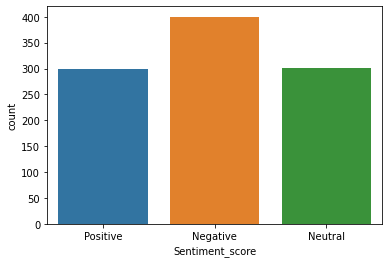

In [ ]:
sns.countplot(df_text['Sentiment_score'],label = 'count')

Pie-chart

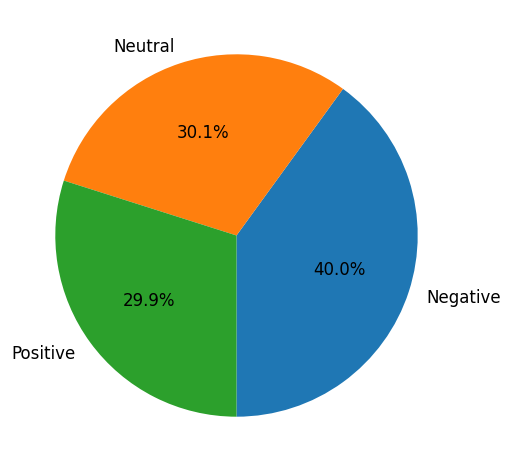

In [ ]:
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")

Word cloud to visualize sentiments

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wordcloud import WordCloud

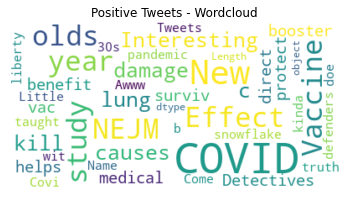

In [ ]:
# Wordcloud with positive tweets
positive_tweets = df_text['Tweets'][df_text["Sentiment_score"] == 'Positive']
positive_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(str(positive_tweets))
plt.figure()
plt.title("Positive Tweets - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
 


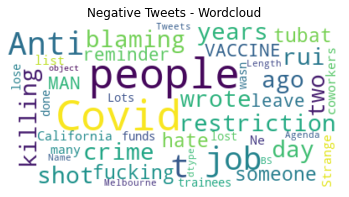

In [ ]:
# Wordcloud with negative tweets
negative_tweets = df_text['Tweets'][df_text["Sentiment_score"] == 'Negative']
negative_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(str(negative_tweets))
plt.figure()
plt.title("Negative Tweets - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

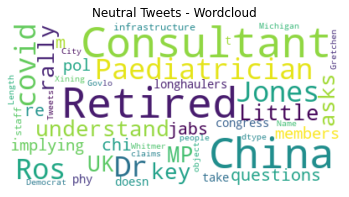

In [ ]:
# Wordcloud with negative tweets
negative_tweets = df_text['Tweets'][df_text["Sentiment_score"] == 'Neutral']
negative_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(str(negative_tweets))
plt.figure()
plt.title("Neutral Tweets - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Using networkx to analyse social relationship

In [ ]:
allNames = list(df_tweets['u_screen_name'].unique())
allNames

['CarolPe64837759',
 'amakabot',
 'AbutiLawrence',
 'thedotconnectr',
 'RUB1G',
 'KimHale12646740',
 'MixinTunz',
 'RFouru',
 'kdentr',
 'rowiniec',
 'urmeloody',
 'CarmineDiBattis',
 'wokabaut_meri',
 'RisingDarkstar',
 'foneguy2',
 'QuoticIndepend1',
 'PapaMojoJoeJoe',
 'BlueRaveFinn',
 'KliquidTV',
 'AlisonH15864665',
 'jthurgood1',
 'shaunprend',
 'JBrown94573224',
 'farid__jalali',
 'lorrainefox1818',
 'cchucklee',
 'LouShoe2',
 'Charlotte_Giuli',
 'ecwpunk81',
 'goldbrg',
 'RedlippieL',
 'K2020Cat',
 'GoPoloe',
 'Andybqy',
 'FantasyChamp2x',
 'DonBuckets',
 'sunshinesmasks',
 'Truth_Freedom23',
 'jmcin9',
 'CalNurses',
 'SafetyFirst____',
 'barkflight',
 'wklong14',
 'tchoppy',
 'Gym2Lift',
 'MorrisAltalef1',
 'denverlorenzo9',
 'jellen805',
 'Lillian_DJT2020',
 'cdnflygirl1',
 'McneeceLucy',
 'KarenNagle2',
 'bringit1313',
 'karzluv',
 'austinsaral',
 'bellaxotchl',
 'MikeMalizia1',
 'JustineGSwaab',
 'AmandaC_Young',
 'fertorero',
 'byua99',
 'JohnConnorATL',
 'Chiffonelle29',


In [ ]:
sample_names=[] 
sample_names = allNames[0:1]
sample_names

['CarolPe64837759']

In [ ]:
#retrieve user information
# Initialize dataframe of users that will hold the edge relationships
dfUserinfo = pd.DataFrame()
dfUserinfo['userFromName'] =[]
dfUserinfo['userFromId'] =[]
dfUserinfo['userToId'] = []
count = 0
dfUserinfo

,userFromName,userFromId,userToId


In [ ]:
nameCount = len(sample_names)
# The choice to retrieve friends (who the user is following) rather than followers is intentional.
# Either would work. However, many Twitter users follow fewer users than are following them, especially the most popular accounts. 
# This reduces the number of very large calls to Twitter API, which seemed to cause problems.
for name in sample_names:
    # Build list of friends    
    currentFriends = []
    for page in tw.Cursor(api.friends_ids, screen_name=name).pages():
        currentFriends.extend(page)
    currentId = api.get_user(screen_name=name).id
    currentId = [currentId] * len(currentFriends)
    currentName = [name] * len(currentFriends)   
    dfTemp = pd.DataFrame()
    dfTemp['userFromName'] = currentName
    dfTemp['userFromId'] = currentId
    dfTemp['userToId'] = currentFriends
    dfUserinfo = pd.concat([dfUserinfo,dfTemp])
    #time.sleep(70) # avoids hitting Twitter rate limit
    # Progress bar to track approximate progress
    count +=1
    per = round(count*100.0/nameCount,1)
    sys.stdout.write("\rTwitter call %s%% complete." % per)
    sys.stdout.flush() 

Twitter call 100.0% complete.

In [ ]:
dfUserinfo

,userFromName,userFromId,userToId
0,CarolPe64837759,9.136135e+17,2.614847e+07
1,CarolPe64837759,9.136135e+17,9.121875e+07
2,CarolPe64837759,9.136135e+17,1.146549e+18
3,CarolPe64837759,9.136135e+17,1.950531e+07
4,CarolPe64837759,9.136135e+17,2.461810e+09
...,...,...,...
900,CarolPe64837759,9.136135e+17,1.334546e+08
901,CarolPe64837759,9.136135e+17,9.048175e+07
902,CarolPe64837759,9.136135e+17,8.013912e+07
903,CarolPe64837759,9.136135e+17,5.650367e+07


In [ ]:
# No more Twitter API lookups are necessary. Create a lookup table that we will use to get the verify the userToName
dfLookup = dfUserinfo[['userFromName','userFromId']]
dfLookup = dfLookup.drop_duplicates()
dfCircle = dfUserinfo


In [ ]:
dfCircle

,userFromName,userFromId,userToId
0,CarolPe64837759,9.136135e+17,2.614847e+07
1,CarolPe64837759,9.136135e+17,9.121875e+07
2,CarolPe64837759,9.136135e+17,1.146549e+18
3,CarolPe64837759,9.136135e+17,1.950531e+07
4,CarolPe64837759,9.136135e+17,2.461810e+09
...,...,...,...
900,CarolPe64837759,9.136135e+17,1.334546e+08
901,CarolPe64837759,9.136135e+17,9.048175e+07
902,CarolPe64837759,9.136135e+17,8.013912e+07
903,CarolPe64837759,9.136135e+17,5.650367e+07


In [ ]:
!pip install chart_studio
from chart_studio import plotly
from plotly.graph_objs import *


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
dfCircle.to_csv('dfCircle.csv',index = False,encoding='utf-8')

In [ ]:
df = pd.read_csv('dfCircle.csv')

In [ ]:
# Convert user ID from float to integer.
df.userFromId=df.userFromId.apply(lambda x: int(x))
df.userToId=df.userToId.apply(lambda x: int(x))

In [ ]:
df.userToId

0                 26148473
1                 91218749
2      1146549333510070400
3                 19505306
4               2461810448
              ...         
900              133454567
901               90481750
902               80139117
903               56503668
904              198324664
Name: userToId, Length: 905, dtype: int64

In [ ]:
df.userFromId

0      913613547879383040
1      913613547879383040
2      913613547879383040
3      913613547879383040
4      913613547879383040
              ...        
900    913613547879383040
901    913613547879383040
902    913613547879383040
903    913613547879383040
904    913613547879383040
Name: userFromId, Length: 905, dtype: int64

In [ ]:
G = nx.DiGraph()
G.add_nodes_from(df['userFromId'])

In [ ]:
temp = zip(df['userFromId'],df['userToId'])
G.add_edges_from(temp)

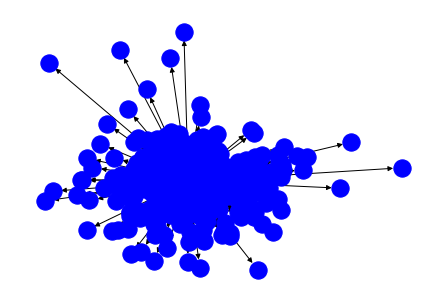

In [ ]:
nx.draw(G, pos=nx.spectral_layout(G),node_color='blue',edge_color='black')


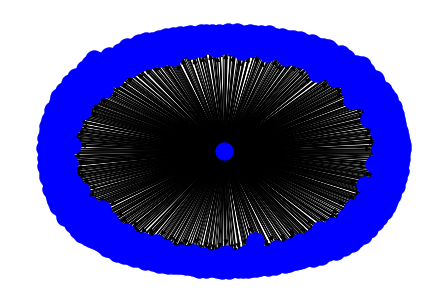

In [ ]:
nx.draw(G, pos=nx.spring_layout(G,k=.1),node_color='blue',edge_color='k')


>>  # **Happy Learning ✌**





